### Домашнее задание к лекции "Поиск выбросов и генерация новых признаков" 

Взять датасет https://www.kaggle.com/c/sberbank-russian-housing-market/overview

1. Провести EDA с упором на пропущенные значения и выбросы
2. Обучить простую модель несколько раз (см. ниже) и сравнить качество.
3. При обучении модели постепенно фильтровать выбросы и заполнять пропуски. При фильтрации выбросов и заполнении пропусков при необходимости обосновывать выбранные методы.
4. Сгенерировать не менее новых 5 признаков (генерация с помощью PolynomialFeatures считать как один признак) и обучить модель после каждого добавления нового признака для контроля качества.
5. Построить изменения качества график качества модели на каждом шаге (после обработки каждого признака и после каждого добавления нового признака)

Используйте столбцы:

[‘full_sq’, ‘life_sq’, ‘floor’, ‘max_floor’, ‘material’, ‘build_year’, ‘num_room’, ‘kitch_sq’,
‘state’, ‘area_m’, ‘raion_popul’, ‘green_zone_part’, ‘indust_part’, ‘preschool_education_centers_raion’,
‘school_education_centers_raion’, ‘hospital_beds_raion’, ‘healthcare_centers_raion’, ‘sport_objects_raion’,
‘additional_education_raion’, ‘shopping_centers_raion’, ‘office_raion’, ‘ID_metro’, ‘metro_min_walk’, ‘kindergarten_km’,
‘school_km’, ‘park_km’, ‘green_zone_km’, ‘industrial_km’, ‘water_km’, ‘mkad_km’, ‘ttk_km’, ‘sadovoe_km’, ‘bulvar_ring_km’,
‘kremlin_km’, ‘ts_km’, ‘big_market_km’,‘market_shop_km’, ‘fitness_km’, ‘university_km’, ‘workplaces_km’, ‘shopping_centers_km’,
‘office_km’, ‘additional_education_raion’, ‘preschool_km’, ‘price_doc’]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Посмотрим на данные

In [2]:
data = pd.read_csv('C:\\Users\\2-hom\\Documents\\Data_analysis\\Машинное обучение\\Занятие_9\\Домашнее задание\\train.csv')
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


Для анализа будем использовать следующие признаки:

In [4]:
df = data[['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq',
'state', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'preschool_education_centers_raion',
'school_education_centers_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion',
'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'ID_metro', 'metro_min_walk', 'kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km','mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'preschool_km', 'price_doc']] 

In [5]:
df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
0,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,6.407578e+06,...,4.308127,10.814172,1.676258,0.485841,6.715026,0.884350,0.648488,0.637189,0.177975,5850000
1,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,9.589337e+06,...,0.725560,6.910568,3.424716,0.668364,1.852560,0.686252,0.519311,0.688796,0.273345,6000000
2,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.808270e+06,...,3.562188,5.752368,1.375443,0.733101,0.841254,1.510089,1.486533,1.543049,0.158072,5700000
3,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,1.258354e+07,...,0.583025,27.892717,0.811275,0.623484,10.903161,0.622272,0.599914,0.934273,0.236455,13100000
4,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,8.398461e+06,...,2.609420,9.155057,1.969738,0.220288,0.991683,0.892668,0.429052,0.077901,0.376838,16331452


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            30471 non-null  int64  
 1   life_sq                            24088 non-null  float64
 2   floor                              30304 non-null  float64
 3   max_floor                          20899 non-null  float64
 4   material                           20899 non-null  float64
 5   build_year                         16866 non-null  float64
 6   num_room                           20899 non-null  float64
 7   kitch_sq                           20899 non-null  float64
 8   state                              16912 non-null  float64
 9   area_m                             30471 non-null  float64
 10  raion_popul                        30471 non-null  int64  
 11  green_zone_part                    30471 non-null  flo

Т.к. основными характеристиками жилья являются:
* full_sq: общая площадь в квадратных метрах, включая лоджии, балконы и другие нежилые помещения
* life_sq: жилая площадь в квадратных метрах без учета лоджий, балконов и других нежилых помещений
* num_room: количество жилых комнат
* kitch_sq: кухонная зона

Удалим из данных строки, где отсутсвуют данные по этим признакам (удаляем все строки с NaN)

In [7]:
df = df.dropna(subset=['life_sq', 'num_room','kitch_sq'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16758 entries, 7672 to 30470
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            16758 non-null  int64  
 1   life_sq                            16758 non-null  float64
 2   floor                              16758 non-null  float64
 3   max_floor                          16758 non-null  float64
 4   material                           16758 non-null  float64
 5   build_year                         16088 non-null  float64
 6   num_room                           16758 non-null  float64
 7   kitch_sq                           16758 non-null  float64
 8   state                              15207 non-null  float64
 9   area_m                             16758 non-null  float64
 10  raion_popul                        16758 non-null  int64  
 11  green_zone_part                    16758 non-null  

In [9]:
df.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
7672,73,36.0,17.0,17.0,1.0,NaN,2.0,11.0,NaN,14883622.34,...,2.105310,12.015274,1.076679,0.811599,5.862093,2.680298,2.285872,3.130025,0.211999,10100000
8056,11,11.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,10071560.22,...,4.797509,9.892177,3.609579,0.773059,1.519220,0.185809,0.300637,0.112276,0.197451,2750000
8135,53,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,5646405.14,...,4.442725,9.819833,2.238991,0.821462,5.880034,1.038248,0.777665,0.162024,0.364994,9000000
8144,41,37.0,13.0,17.0,1.0,NaN,1.0,1.0,NaN,21494094.80,...,9.568216,14.068657,6.187529,0.888687,18.634244,9.017858,3.407867,5.350487,0.827115,4457400
8153,77,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,21494094.80,...,9.658805,14.350258,6.469129,0.822324,18.915844,8.941513,3.172334,5.087106,0.936324,7011550


Т.к. жилая площадь не может быть больше общей площади, следовательно строки с такими данными не верны, найдем и удалим их.

In [10]:
df[df['full_sq'] < df['life_sq']]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
9237,47,301.0,4.0,12.0,1.0,1973.0,2.0,6.0,2.0,8.464344e+06,...,1.022222,11.532895,8.145321,1.125978,11.691921,0.986774,1.624548,2.228742,0.367718,5600000
9256,77,458.0,12.0,16.0,1.0,1996.0,3.0,10.0,3.0,2.481385e+07,...,1.670753,5.418817,1.169203,0.767063,8.807771,2.303884,1.479057,2.734316,0.114576,13750000
9482,52,53.0,12.0,1.0,1.0,1983.0,2.0,8.0,3.0,3.879802e+06,...,1.846094,5.437818,3.013598,0.591778,3.561856,0.929484,0.780029,0.780029,0.298627,3000000
11332,1,40.0,10.0,17.0,1.0,2013.0,1.0,1.0,1.0,7.878765e+06,...,10.750461,18.673218,0.814887,3.594740,20.404176,8.997875,1.774762,1.092125,2.204638,3357774
11711,56,58.0,15.0,17.0,1.0,1986.0,2.0,10.0,2.0,7.811375e+06,...,1.838514,1.883012,1.821973,1.268764,3.583179,1.697025,0.806937,1.074365,0.371872,2000000
11784,46,59.0,12.0,17.0,1.0,1987.0,3.0,9.0,3.0,6.982964e+06,...,2.585994,20.638529,5.352146,0.675071,5.610651,0.980007,0.527372,0.400590,0.413636,15000000
12569,56,60.0,3.0,25.0,4.0,2014.0,2.0,10.0,1.0,1.258354e+07,...,0.678700,26.815150,0.952691,0.341012,9.825595,0.249131,0.179545,0.000000,0.249131,9897007
13546,79,7478.0,8.0,17.0,1.0,2014.0,3.0,1.0,1.0,2.149409e+07,...,9.530140,14.703756,6.287163,0.680017,18.733878,8.802153,3.231528,5.072389,0.826052,7705000
13629,45,259.0,5.0,5.0,1.0,1970.0,2.0,5.0,NaN,4.036700e+07,...,6.009804,13.448962,9.624964,1.869427,10.796619,9.907037,0.980817,0.980817,3.532680,4900000
13797,32,163.0,3.0,5.0,5.0,1963.0,1.0,6.0,3.0,7.878765e+06,...,9.959724,18.381917,1.972207,3.319740,20.112876,8.226733,2.410614,1.002881,2.250027,3550000


In [11]:
df = df[(df['full_sq'] > df['life_sq']) | (df['full_sq'].isna())] # удалим эти выбросы

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14944 entries, 7672 to 30470
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            14944 non-null  int64  
 1   life_sq                            14944 non-null  float64
 2   floor                              14944 non-null  float64
 3   max_floor                          14944 non-null  float64
 4   material                           14944 non-null  float64
 5   build_year                         14584 non-null  float64
 6   num_room                           14944 non-null  float64
 7   kitch_sq                           14944 non-null  float64
 8   state                              13618 non-null  float64
 9   area_m                             14944 non-null  float64
 10  raion_popul                        14944 non-null  int64  
 11  green_zone_part                    14944 non-null  

Сначала посмотрим выбросы, а после этого будем заполнять пропущенные значения. 

In [13]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
        plt.show()
    pass  

def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass    

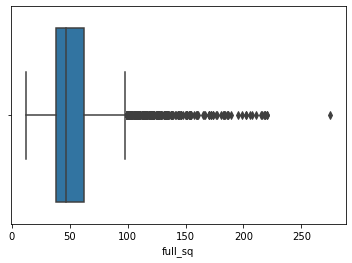

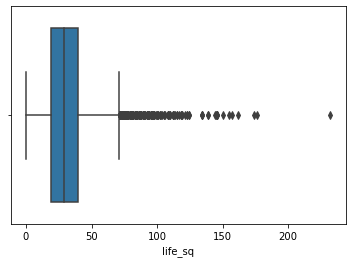

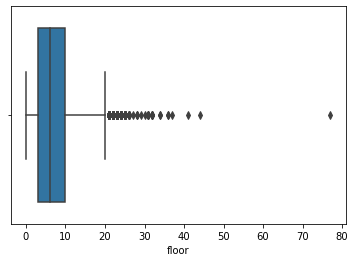

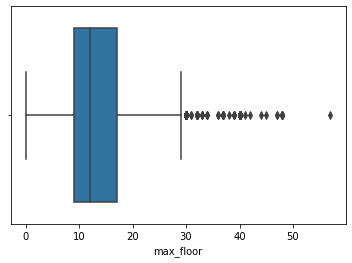

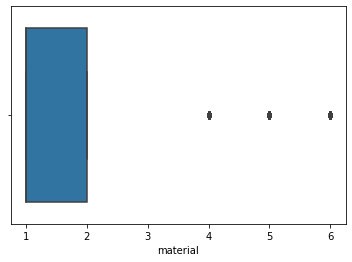

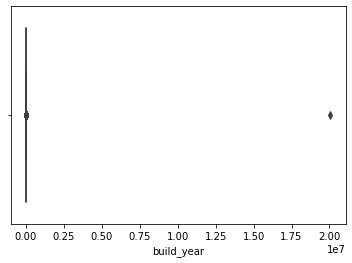

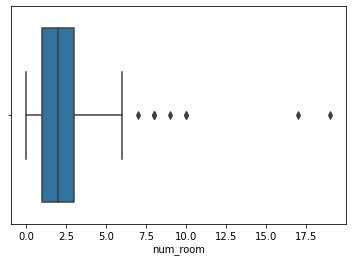

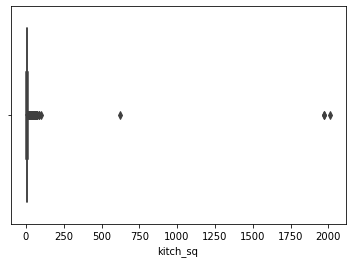

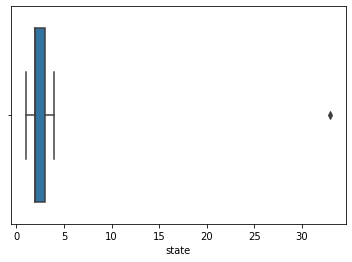

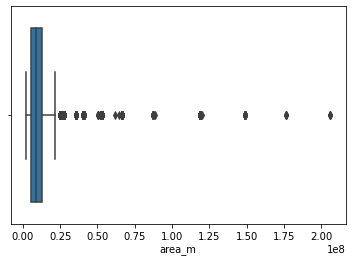

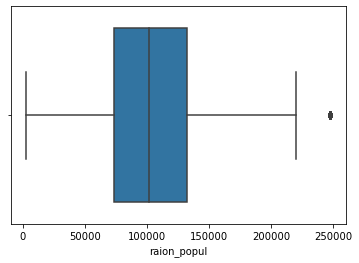

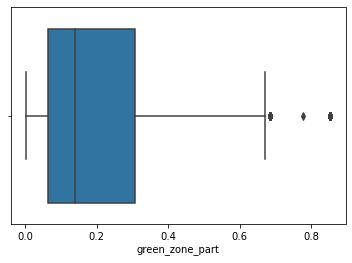

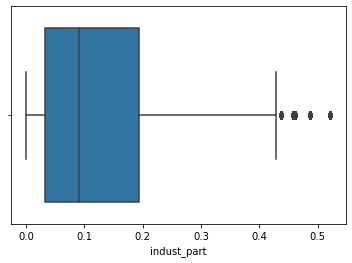

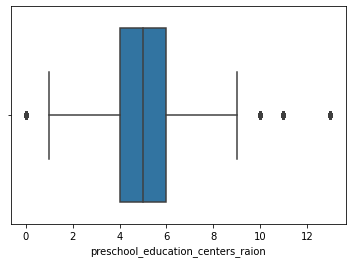

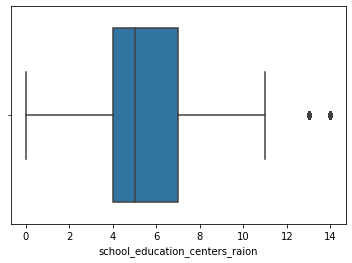

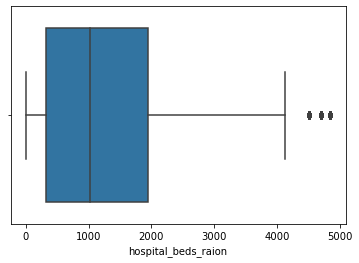

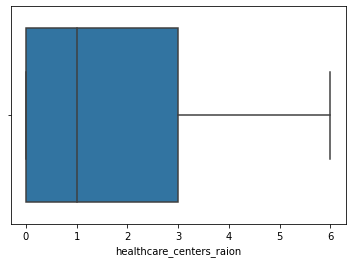

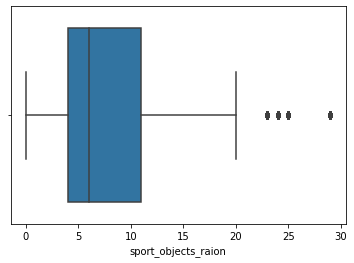

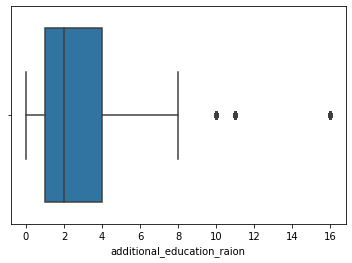

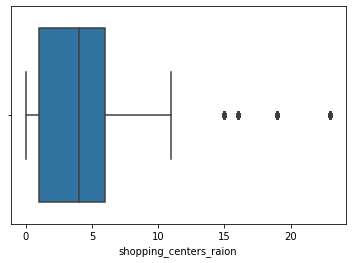

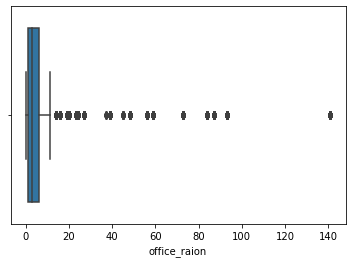

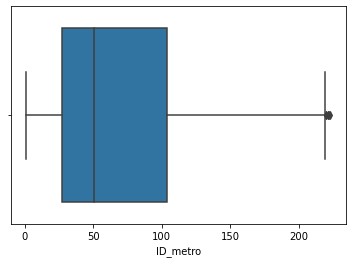

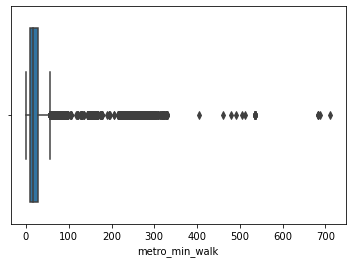

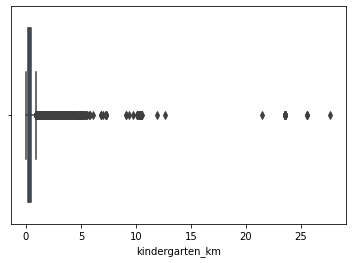

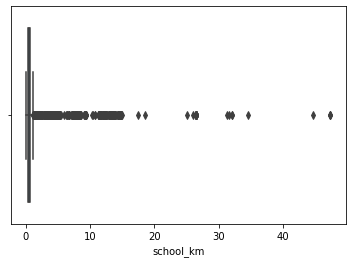

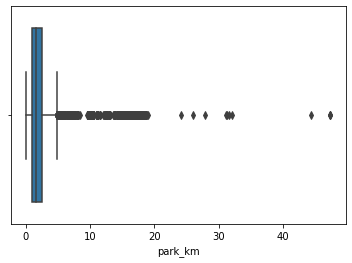

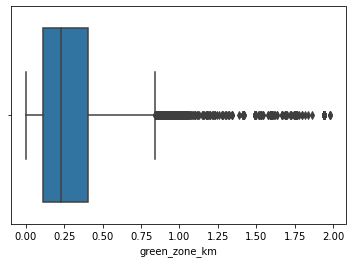

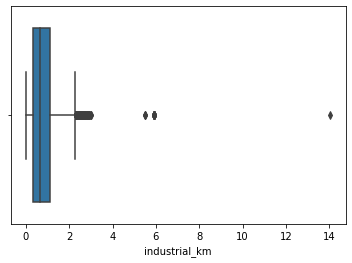

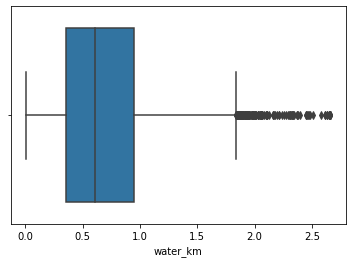

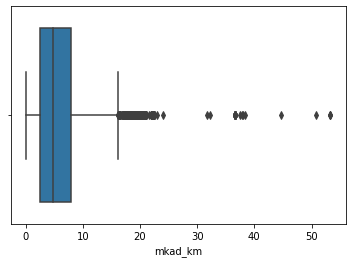

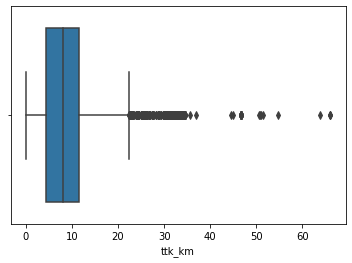

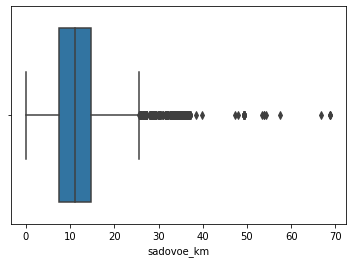

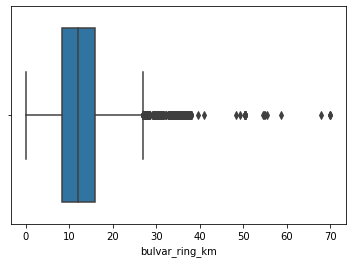

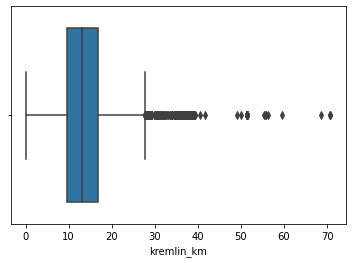

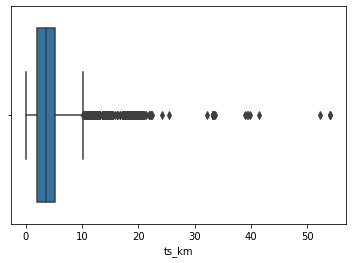

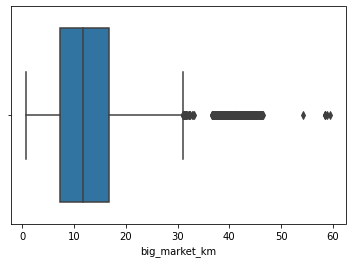

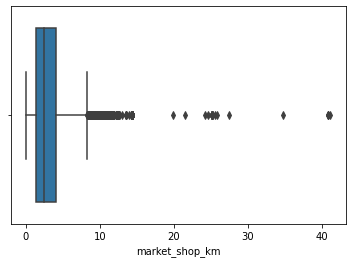

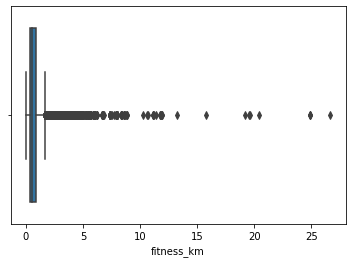

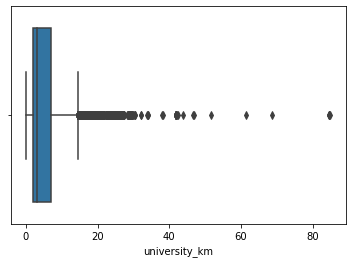

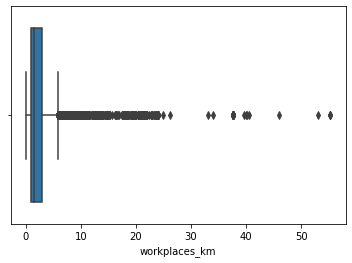

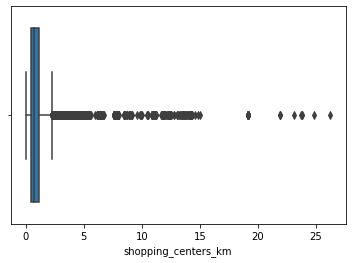

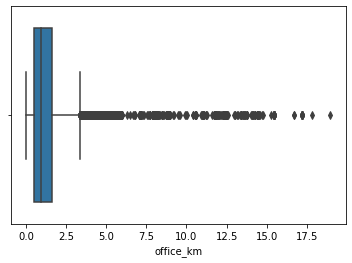

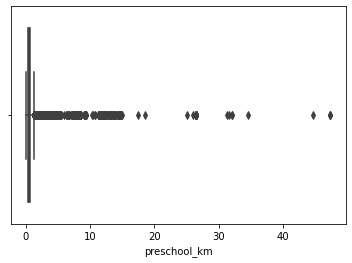

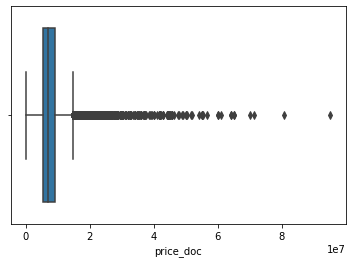

In [14]:
get_boxplot(df, columns=df.columns) # Построим boxplot

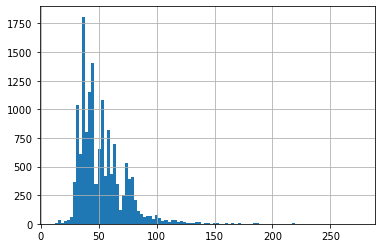

In [15]:
df['full_sq'].hist(bins=100) # общая площадь в квадратных метрах, включая лоджии, балконы и другие нежилые помещения
plt.show()

In [16]:
df[df['full_sq'] > 250]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
18525,275,232.0,11.0,37.0,6.0,2009.0,5.0,26.0,1.0,7963518.819,...,3.781039,32.282788,1.640811,0.103632,3.875657,2.349161,0.663088,1.57578,0.139822,15919294


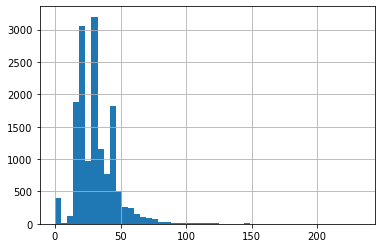

In [17]:
df['life_sq'].hist(bins=50) # жилая площадь в квадратных метрах без учета лоджий, балконов и других нежилых помещений
plt.show() 

In [18]:
df[df['life_sq'] > 150]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
17277,220,176.0,8.0,12.0,4.0,2007.0,2.0,12.0,1.0,5.333221e+06,...,3.733763,25.196280,3.007947,0.000000,4.101034,2.077966,0.568045,0.000000,0.277774,37325704
18525,275,232.0,11.0,37.0,6.0,2009.0,5.0,26.0,1.0,7.963519e+06,...,3.781039,32.282788,1.640811,0.103632,3.875657,2.349161,0.663088,1.575780,0.139822,15919294
23896,218,174.0,10.0,12.0,4.0,2007.0,2.0,13.0,3.0,5.333221e+06,...,3.733763,25.196280,3.007947,0.000000,4.101034,2.077966,0.568045,0.000000,0.277774,46191272
25304,160,155.0,3.0,17.0,4.0,0.0,4.0,20.0,1.0,1.163805e+07,...,1.245817,13.101129,3.409679,0.259377,2.315599,0.538064,0.667409,0.228588,0.211070,36860612
27771,199,157.0,10.0,12.0,4.0,2007.0,2.0,11.0,1.0,5.333221e+06,...,3.733763,25.196280,3.007947,0.000000,4.101034,2.077966,0.568045,0.000000,0.277774,41984796
29656,211,162.0,5.0,5.0,2.0,1914.0,6.0,19.0,3.0,1.163805e+07,...,4.012585,9.921696,2.627911,0.220871,0.977481,0.823437,0.969444,0.214195,0.219068,70000000


In [19]:
df['floor'].value_counts().sort_index() # посмотрим на данные этаж дома для квартир

0.0        2
1.0     1157
2.0     1577
3.0     1602
4.0     1398
5.0     1549
6.0      985
7.0     1050
8.0      910
9.0      890
10.0     568
11.0     569
12.0     614
13.0     397
14.0     416
15.0     275
16.0     325
17.0     240
18.0      78
19.0      65
20.0      47
21.0      49
22.0      64
23.0      35
24.0      26
25.0      24
26.0       8
27.0       1
28.0       3
29.0       1
30.0       1
31.0       5
32.0       5
34.0       2
36.0       2
37.0       1
41.0       1
44.0       1
77.0       1
Name: floor, dtype: int64

In [20]:
df['max_floor'].value_counts().sort_index() # посмотрим на данные количество этажей в здании

0.0       55
1.0      261
2.0       42
3.0       90
4.0      168
5.0     2213
6.0      117
7.0       93
8.0      282
9.0     2887
10.0     217
11.0      33
12.0    2000
13.0      44
14.0    1320
15.0     151
16.0    1050
17.0    2354
18.0     121
19.0      88
20.0      56
21.0      36
22.0     506
23.0      76
24.0     234
25.0     299
26.0       9
27.0      15
28.0       8
29.0       6
30.0      39
31.0       2
32.0      13
33.0       3
34.0       3
36.0       2
37.0       7
38.0       1
39.0       4
40.0      25
41.0       1
42.0       1
44.0       1
45.0       1
47.0       2
48.0       7
57.0       1
Name: max_floor, dtype: int64

In [21]:
df[df['floor'] == 77]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
23584,57,33.0,77.0,22.0,1.0,1986.0,2.0,10.0,3.0,3326418.741,...,5.093557,6.221886,3.268157,0.489492,2.655779,2.848309,0.749363,0.310557,0.489763,13700000


In [22]:
df[df['floor'] > df['max_floor']] # есть ли выбросы, где этаж квартиры выше, чем общая этажность дома?

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
8216,58,30.0,13.0,0.0,1.0,NaN,2.0,0.0,NaN,2.149409e+07,...,9.530140,14.703756,6.287163,0.680017,18.733878,8.802153,3.231528,5.072389,0.826052,5813760
8499,37,18.0,2.0,0.0,1.0,1979.0,1.0,0.0,2.0,6.407578e+06,...,4.120848,9.884731,1.663206,0.196244,5.785585,1.053419,0.458838,0.098661,0.409607,6000000
8531,34,15.0,7.0,0.0,6.0,NaN,1.0,8.0,1.0,2.149409e+07,...,9.658805,14.350258,6.469129,0.822324,18.915844,8.941513,3.172334,5.087106,0.936324,3842500
8912,51,30.0,5.0,0.0,1.0,1997.0,2.0,8.0,1.0,3.292112e+06,...,1.948918,16.583547,3.452315,0.383613,4.026318,2.482394,0.123968,0.322388,0.313762,3850000
9161,83,42.0,8.0,3.0,2.0,1961.0,3.0,9.0,2.0,7.307411e+06,...,2.510430,9.616704,1.495449,0.284263,1.983626,1.896555,0.502987,0.245144,0.892591,24435000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30273,78,0.0,12.0,0.0,1.0,2014.0,3.0,0.0,3.0,9.282439e+06,...,1.593704,12.258537,5.233650,1.274855,9.429381,1.144628,0.291261,0.300944,0.374914,1085877
30317,47,1.0,8.0,1.0,1.0,2016.0,1.0,1.0,1.0,9.629358e+06,...,1.377786,18.654048,5.429086,0.634820,1.223753,2.271688,0.146429,0.146429,1.071225,9475779
30341,50,1.0,22.0,1.0,1.0,2015.0,1.0,1.0,1.0,1.216448e+07,...,1.634596,22.065232,10.539046,1.351899,13.932980,3.143915,0.295711,1.795339,1.795339,7350000
30353,37,1.0,9.0,1.0,1.0,NaN,1.0,1.0,1.0,3.574795e+07,...,9.925311,12.170059,14.300333,3.470590,16.828867,10.915502,4.152144,4.152144,7.872947,3596400


In [23]:
df = df[(df['floor'] <= df['max_floor']) | (df['floor'].isna())] # т.к. этаж квартиры не может быть больше количества этажей в здании

In [24]:
df['material'].value_counts().sort_index()

1.0    9082
2.0    2811
4.0     726
5.0    1520
6.0     475
Name: material, dtype: int64

In [25]:
df['build_year'].value_counts().sort_index() # посмотрим на года постройки домов

0.0            42
1.0            74
71.0            1
1691.0          1
1860.0          2
             ... 
2016.0        145
2017.0         87
2018.0          1
4965.0          1
20052009.0      1
Name: build_year, Length: 116, dtype: int64

In [26]:
df[df['build_year'] < 1000] #  дома с годами постройки ранее 1000 г.

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
9620,65,35.0,7.0,12.0,1.0,1.0,2.0,1.0,1.0,7.632940e+06,...,1.572189,15.773739,4.034559,0.989110,4.952442,3.232352,0.529696,0.837760,0.431915,5415070
10329,53,25.0,3.0,5.0,2.0,1.0,1.0,9.0,2.0,5.235177e+07,...,1.397613,19.834540,6.311546,0.928254,6.822104,0.771958,1.196845,0.598985,0.148581,7000000
10594,82,50.0,3.0,17.0,1.0,1.0,3.0,11.0,1.0,1.308980e+07,...,1.977778,23.965818,0.855758,0.409914,4.788078,0.454125,0.428195,0.428195,0.526611,7176060
11580,60,33.0,8.0,17.0,1.0,1.0,2.0,12.0,1.0,1.139168e+07,...,5.013100,10.264218,5.439734,2.493236,8.837248,5.599071,2.215104,4.778766,0.214197,5959680
12043,62,43.0,11.0,12.0,1.0,1.0,2.0,14.0,2.0,7.462270e+06,...,4.392051,1.166524,0.861142,0.959898,3.952189,0.757336,0.400451,0.573493,0.707000,9000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29685,90,38.0,2.0,2.0,1.0,0.0,3.0,0.0,NaN,3.574795e+07,...,9.892700,18.145323,14.321325,3.897271,15.492980,12.650180,3.242714,3.242714,5.222637,5535810
29871,44,29.0,4.0,5.0,2.0,1.0,2.0,5.0,3.0,5.391434e+06,...,0.775984,7.422519,0.304523,0.169604,1.588247,2.775462,0.465191,0.465191,0.638850,1600000
30275,35,20.0,4.0,12.0,1.0,71.0,1.0,9.0,2.0,1.631523e+07,...,18.631280,18.471748,2.233338,0.556831,23.130555,19.604441,12.132432,12.132432,13.371962,4200000
30281,62,1.0,14.0,25.0,1.0,1.0,2.0,1.0,1.0,1.258354e+07,...,0.503765,26.369825,2.055468,0.355630,9.380269,1.016728,0.553097,0.654486,0.631866,8921331


In [27]:
df = df[(df['build_year'] > 1600) | (df['build_year'].isna())]

In [28]:
df[df['build_year'] > 2021] # гости из будущего

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
10089,37,16.0,8.0,12.0,1.0,20052009.0,1.0,9.0,33.0,5467178.309,...,3.694416,5.993103,2.794578,0.262379,1.289754,1.482080,0.700188,0.250911,0.744923,9000000
15220,41,24.0,4.0,9.0,2.0,4965.0,2.0,5.0,3.0,7905261.321,...,5.042647,13.728241,1.401470,0.377579,1.358445,0.536918,0.936226,0.137847,0.316895,8400000


In [29]:
df = df[(df['build_year'] <= 2021) | (df['build_year'].isna())]

In [30]:
df['num_room'].value_counts().sort_index()

0.0        3
1.0     4958
2.0     5687
3.0     3450
4.0      349
5.0       32
6.0        7
7.0        1
8.0        3
9.0        1
10.0       2
17.0       1
19.0       1
Name: num_room, dtype: int64

In [31]:
df[df['num_room'] == 0] # отсутствуют жилые комнаты

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
24880,34,19.0,9.0,16.0,5.0,1982.0,0.0,9.0,3.0,9.282439e+06,...,2.643816,11.188896,4.029727,0.848260,12.919855,1.050794,0.561891,0.284228,1.050794,5400000
25372,30,18.0,2.0,8.0,2.0,1961.0,0.0,6.0,2.0,5.704502e+06,...,4.136835,6.225121,1.593223,0.122922,2.340846,1.072759,0.975181,0.235393,0.645266,1000000
27454,135,134.0,3.0,3.0,6.0,2013.0,0.0,0.0,1.0,1.631523e+07,...,17.593123,18.717327,4.242527,1.348050,23.376135,18.690225,11.079160,11.079160,12.829683,9308100


In [32]:
df = df[(df['num_room'] > 0) | (df['num_room'].isna())]

In [33]:
df['kitch_sq'].value_counts().sort_index()

0.0        73
1.0       680
2.0        14
3.0        44
4.0        85
         ... 
86.0        1
97.0        1
620.0       1
1974.0      1
2013.0      1
Name: kitch_sq, Length: 61, dtype: int64

In [34]:
df = df[(df['kitch_sq'] < df['full_sq']) | (df['kitch_sq'].isna())] # т.к. размер кухни не может быть больше общей площади квартиры

In [35]:
df[df['kitch_sq'] <= 2] # кухни, с площадью менее 2 метров

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
8144,41,37.0,13.0,17.0,1.0,NaN,1.0,1.0,NaN,2.149409e+07,...,9.568216,14.068657,6.187529,0.888687,18.634244,9.017858,3.407867,5.350487,0.827115,4457400
8498,59,33.0,16.0,17.0,1.0,2006.0,2.0,0.0,NaN,3.875439e+06,...,1.841320,17.007843,3.876612,0.149921,4.455436,2.171582,0.486403,0.533079,0.109474,9850000
8788,37,19.0,14.0,17.0,1.0,NaN,1.0,1.0,1.0,1.139168e+07,...,5.013100,10.264218,5.439734,2.493236,8.837248,5.599071,2.215104,4.778766,0.214197,3845468
8811,39,29.0,4.0,12.0,5.0,1965.0,2.0,0.0,2.0,5.235177e+07,...,1.415644,20.222695,9.547351,0.842331,8.958186,0.246783,1.275273,1.154157,0.246783,7650000
9594,44,29.0,3.0,9.0,1.0,1971.0,2.0,0.0,NaN,1.752651e+07,...,1.334436,11.922278,3.610868,1.227135,3.235379,4.745330,0.770421,1.037686,0.855242,6650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435,82,1.0,12.0,12.0,6.0,2015.0,3.0,1.0,1.0,6.677245e+07,...,3.930866,2.984158,5.114432,1.359893,7.642966,4.835699,3.223617,2.481875,3.100110,7491396
30441,113,1.0,26.0,26.0,1.0,2015.0,4.0,1.0,1.0,7.307411e+06,...,3.757130,7.836658,1.092897,0.269716,2.180440,1.091507,0.107360,0.182194,0.269716,25039300
30453,45,1.0,6.0,15.0,6.0,2015.0,1.0,1.0,1.0,2.615514e+07,...,6.236491,11.582870,3.689143,0.643319,13.313828,4.075042,0.670078,3.868832,1.002582,4066740
30458,50,1.0,7.0,7.0,1.0,2015.0,1.0,0.0,1.0,4.036700e+07,...,1.667530,8.281028,1.948185,0.844727,5.842595,5.247596,0.742543,0.743497,1.690124,6370777


In [36]:
df = df[(df['kitch_sq'] >= 2) | (df['kitch_sq'].isna())]

In [37]:
df['raion_popul'].value_counts().sort_index()

2546       42
2693        1
2942        1
3521        3
4001       71
         ... 
175518    234
178264    324
178473    215
219609    192
247469    363
Name: raion_popul, Length: 145, dtype: int64

In [38]:
df['green_zone_part'].value_counts().sort_index()

0.001879     39
0.004676      3
0.007670     48
0.009851      8
0.011048     19
           ... 
0.649578      1
0.670840     12
0.683844    164
0.776419      1
0.852923     47
Name: green_zone_part, Length: 145, dtype: int64

In [39]:
df['indust_part'].value_counts().sort_index()

0.000000e+00    1140
1.800000e-09      32
6.998930e-05     164
7.815280e-05      79
1.696760e-04     143
                ... 
4.378852e-01      93
4.581745e-01     121
4.605564e-01      64
4.862456e-01      48
5.218671e-01      80
Name: indust_part, Length: 131, dtype: int64

In [40]:
df['preschool_education_centers_raion'].value_counts().sort_index()

0      650
1      541
2      860
3      832
4     3203
5     2660
6     1923
7     1262
8      490
9      215
10     395
11     324
13     363
Name: preschool_education_centers_raion, dtype: int64

In [41]:
df['school_education_centers_raion'].value_counts().sort_index()

0      647
1      306
2      491
3      933
4     1744
5     2677
6     2110
7     1563
8     1145
9      686
10     334
11     192
13     527
14     363
Name: school_education_centers_raion, dtype: int64

In [42]:
df['hospital_beds_raion'].value_counts().sort_index()

0.0         1
30.0      510
32.0       20
35.0        5
46.0       91
         ... 
4087.0     89
4129.0     74
4508.0    108
4702.0     59
4849.0     43
Name: hospital_beds_raion, Length: 79, dtype: int64

In [43]:
df['healthcare_centers_raion'].value_counts().sort_index()

0    3485
1    3971
2    1987
3    2749
4     605
5     774
6     147
Name: healthcare_centers_raion, dtype: int64

In [44]:
df['sport_objects_raion'].value_counts().sort_index()

0      682
1      527
2      321
3     1118
4     1436
5     1027
6     1436
7     1627
8      507
9      223
10     860
11     641
12     576
13     817
14     405
15      39
16     510
17     258
18     239
20      48
23      59
24     119
25      63
29     180
Name: sport_objects_raion, dtype: int64

In [45]:
df['shopping_centers_raion'].value_counts().sort_index()

0     1810
1     1275
2     1274
3     1377
4     1501
5     2276
6      868
7      553
8      506
9      592
10     358
11     603
15     363
16     164
19     119
23      79
Name: shopping_centers_raion, dtype: int64

In [46]:
df['office_raion'].value_counts().sort_index()

0      2533
1      2433
2      1220
3      1481
4      1457
5       733
6       650
7       384
8       353
9       435
10      323
11      342
14      210
16      201
19       48
20       38
23       39
24       74
27       70
37        8
39       48
45       19
48      116
56      119
59       50
73       32
84      101
87       59
93       63
141      79
Name: office_raion, dtype: int64

In [47]:
df['ID_metro'].value_counts().sort_index()

1       82
2      235
3      154
4      104
5       14
      ... 
219      9
220      2
221      2
222      1
223      1
Name: ID_metro, Length: 219, dtype: int64

In [48]:
df['metro_min_walk'].value_counts().sort_index()

0.000000       1
0.102013       1
0.133760       1
0.176630       3
0.381702      16
              ..
505.848712     1
512.456771     1
534.645955    12
683.402824     1
711.215806     1
Name: metro_min_walk, Length: 8752, dtype: int64

In [49]:
df[df['metro_min_walk'] < 1]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
8574,114,69.0,13.0,18.0,4.0,2000.0,3.0,16.0,NaN,1.803644e+07,...,2.164684,20.360414,2.027624,1.187464,2.228543,0.467763,0.933254,0.536273,0.605368,28500000
10832,45,18.0,5.0,5.0,2.0,1957.0,1.0,8.0,2.0,1.308980e+07,...,1.549292,26.980764,0.756540,0.529841,5.188572,0.531055,0.649444,0.635924,1.076059,6700000
10955,81,1.0,3.0,10.0,6.0,2016.0,3.0,14.0,2.0,1.258354e+07,...,0.678700,26.815150,0.952691,0.341012,9.825595,0.249131,0.179545,0.000000,0.249131,10844900
11134,66,43.0,6.0,6.0,2.0,1967.0,2.0,7.0,NaN,4.280227e+06,...,6.320867,6.178905,2.200155,0.365057,1.659391,0.920204,0.126981,0.172758,0.654375,11500000
11157,43,1.0,13.0,13.0,6.0,NaN,1.0,40.0,1.0,1.258354e+07,...,0.678700,26.815150,0.952691,0.341012,9.825595,0.249131,0.179545,0.000000,0.249131,6600879
11455,57,54.0,4.0,12.0,4.0,2015.0,2.0,10.0,4.0,1.258354e+07,...,0.678700,26.815150,0.952691,0.341012,9.825595,0.249131,0.179545,0.000000,0.249131,8244464
11622,43,40.0,16.0,16.0,6.0,2014.0,1.0,10.0,1.0,1.258354e+07,...,0.678700,26.815150,0.952691,0.341012,9.825595,0.249131,0.179545,0.000000,0.249131,7173164
11764,57,54.0,19.0,19.0,6.0,2015.0,2.0,10.0,1.0,1.258354e+07,...,0.678700,26.815150,0.952691,0.341012,9.825595,0.249131,0.179545,0.000000,0.249131,8383079
11803,57,54.0,15.0,20.0,2.0,2015.0,2.0,8.0,1.0,1.258354e+07,...,0.678700,26.815150,0.952691,0.341012,9.825595,0.249131,0.179545,0.000000,0.249131,8322173
12627,80,74.0,12.0,25.0,6.0,2014.0,3.0,10.0,1.0,1.258354e+07,...,0.678700,26.815150,0.952691,0.341012,9.825595,0.249131,0.179545,0.000000,0.249131,11345575


In [50]:
df['kindergarten_km'].value_counts().sort_index()

0.000470      4
0.000628      2
0.000859      1
0.000993      3
0.001173      2
             ..
11.892630     1
12.660125     1
23.526686    12
25.506443     1
27.655479     1
Name: kindergarten_km, Length: 8762, dtype: int64

In [51]:
df['school_km'].value_counts().sort_index()

0.000000     30
0.029162      1
0.032218      3
0.039884      2
0.048816      1
             ..
31.560055     1
32.024149     1
32.070718     1
34.537964     1
47.394706     1
Name: school_km, Length: 8741, dtype: int64

In [52]:
df[df['school_km'] > 10]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
10113,44,17.0,6.0,6.0,2.0,NaN,1.0,14.0,NaN,1.631523e+07,...,20.915365,20.892351,1.126588,0.856807,25.551158,21.665473,14.215808,14.442127,14.780638,4188272
10761,35,18.0,3.0,5.0,1.0,2007.0,1.0,8.0,3.0,2.060718e+08,...,39.491955,39.170183,21.443180,19.571648,43.828991,40.210220,24.876814,4.845655,32.070718,3100000
10824,43,27.0,1.0,5.0,1.0,1976.0,2.0,5.0,NaN,1.199864e+08,...,33.521858,59.501648,25.774963,15.806881,61.232606,33.111480,15.043720,15.261615,25.095537,1000000
11241,41,10.0,15.0,17.0,2.0,2004.0,2.0,19.0,NaN,1.631523e+07,...,20.283970,20.356573,0.502943,0.280414,25.015381,21.105343,13.799814,13.799814,14.400143,4900000
11535,77,48.0,3.0,17.0,6.0,2009.0,3.0,9.0,NaN,1.631523e+07,...,18.134617,18.770151,2.550712,0.931754,23.428959,19.192927,11.620641,11.620641,13.167370,6400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29705,41,16.0,1.0,4.0,2.0,2015.0,1.0,11.0,1.0,1.186638e+08,...,17.952361,32.316186,12.578154,7.686116,29.663842,21.539998,8.728530,8.357788,11.431137,3843960
29742,29,15.0,1.0,4.0,2.0,1968.0,1.0,7.0,2.0,8.699941e+07,...,25.443728,25.004987,7.277983,5.515381,29.663794,26.111340,14.851671,18.958933,18.491632,3050000
30003,31,17.0,4.0,5.0,1.0,1975.0,1.0,5.0,3.0,1.631523e+07,...,19.748201,19.100146,0.187564,0.741789,23.758953,20.350036,13.397087,13.397087,13.408287,3100000
30054,48,30.0,8.0,9.0,2.0,1969.0,2.0,7.0,3.0,1.631523e+07,...,19.866543,19.547868,0.736447,0.366574,24.206675,20.542628,13.438066,13.438066,13.722329,5600000


In [53]:
df['park_km'].value_counts().sort_index()

0.015875     8
0.019556     2
0.024368     1
0.025383     1
0.032041     1
            ..
31.191677    1
31.313376    1
31.670508    1
32.010391    1
47.351538    1
Name: park_km, Length: 8762, dtype: int64

In [54]:
df['big_market_km'].value_counts().sort_index()

0.661366     1
0.705571     1
0.708937     1
0.738960     1
0.750751     1
            ..
46.336857    2
46.497683    1
54.240191    1
58.504511    1
59.501648    1
Name: big_market_km, Length: 8758, dtype: int64

In [55]:
df[df['big_market_km'] > 10]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
7672,73,36.0,17.0,17.0,1.0,NaN,2.0,11.0,NaN,1.488362e+07,...,2.105310,12.015274,1.076679,0.811599,5.862093,2.680298,2.285872,3.130025,0.211999,10100000
8153,77,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,2.149409e+07,...,9.658805,14.350258,6.469129,0.822324,18.915844,8.941513,3.172334,5.087106,0.936324,7011550
8154,45,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,8.889467e+06,...,4.937518,11.121823,1.974416,0.147876,12.852781,2.926501,0.583625,2.477760,0.183503,7100000
8175,38,20.0,15.0,16.0,1.0,1982.0,1.0,8.0,NaN,9.629358e+06,...,3.129585,20.937636,7.712674,0.520086,3.507341,1.691939,1.281947,1.312898,0.782119,6450000
8287,77,50.0,3.0,5.0,2.0,1957.0,3.0,8.0,2.0,4.662813e+06,...,3.908739,20.527042,1.549001,0.717008,2.595420,1.092274,0.375232,0.375232,0.508435,11700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30456,52,30.0,8.0,14.0,1.0,1992.0,2.0,8.0,2.0,1.258354e+07,...,0.446301,26.015357,2.200169,0.124655,9.025801,1.132403,0.213782,0.815652,0.316661,1000000
30462,47,30.0,23.0,25.0,4.0,2016.0,1.0,10.0,1.0,9.629358e+06,...,1.377786,18.654048,5.429086,0.634820,1.223753,2.271688,0.146429,0.146429,1.071225,10544070
30463,56,29.0,13.0,14.0,1.0,2001.0,2.0,11.0,3.0,9.249237e+06,...,0.434827,20.481457,0.293278,1.003262,9.445872,2.106114,0.232778,1.491458,0.193474,12000000
30467,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,3.215552,12.102735,1.825643,0.398831,0.672662,0.796851,0.540003,0.069986,0.362681,25000000


In [56]:
df['market_shop_km'].value_counts().sort_index()

0.021565     1
0.029552     1
0.039567     1
0.043919     1
0.055917     1
            ..
25.509123    1
25.774963    1
27.369411    1
34.701604    1
40.777507    1
Name: market_shop_km, Length: 8758, dtype: int64

In [57]:
df[df['market_shop_km'] > 10]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
8451,38,19.0,16.0,17.0,1.0,2011.0,1.0,7.0,1.0,4.036700e+07,...,6.314745,14.520701,10.696703,0.402275,11.868358,9.129763,0.792992,0.792992,4.653760,2680000
9018,90,48.0,18.0,25.0,1.0,2010.0,2.0,15.0,3.0,4.036700e+07,...,6.180413,14.547227,10.723229,0.366311,11.894884,8.993048,0.902227,0.902227,4.534873,5200000
9270,53,36.0,1.0,5.0,2.0,1960.0,3.0,5.0,NaN,1.531990e+07,...,6.658135,17.771724,10.306151,4.358750,15.119380,12.319825,1.489352,3.745500,0.512043,5650000
9545,38,19.0,8.0,17.0,1.0,2008.0,1.0,7.0,3.0,4.036700e+07,...,6.484321,15.616217,11.792219,0.188007,12.963874,8.568864,1.722343,1.722343,5.040753,2784410
9720,51,30.0,16.0,17.0,1.0,2008.0,2.0,9.0,3.0,4.036700e+07,...,6.401460,15.638198,11.814200,0.167632,12.985855,8.558708,1.657619,1.657619,4.944548,4200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,61,43.0,7.0,9.0,1.0,1979.0,3.0,6.0,3.0,8.338438e+06,...,4.303964,5.920080,10.833667,0.783623,5.762228,0.353443,1.015585,1.015585,0.270277,8950000
30168,34,18.0,1.0,3.0,2.0,2016.0,1.0,10.0,1.0,1.487016e+08,...,33.214743,44.624118,25.085530,7.354662,41.971774,37.681524,19.142082,15.422305,26.499723,1858668
30232,28,27.0,1.0,17.0,1.0,2015.0,1.0,10.0,1.0,3.574795e+07,...,11.910058,16.757073,12.343360,5.541924,18.402802,13.886521,5.309768,5.309768,7.465533,2446787
30255,38,19.0,12.0,17.0,1.0,2008.0,1.0,7.0,3.0,4.036700e+07,...,6.314158,15.135541,11.311542,0.000000,12.483197,8.850245,1.178322,1.178322,4.742088,2240000


Т.к. нам предстоит работать с пропусками, то для их заполнения будем использовать стандартные способы и напишем специальную функцию для этого.
- заполнение значением
- max
- min
- mode
- median
- mean
- метод индикатора
- линейная регрессия

In [58]:
def get_value(X, column, mode='mean', value=0, columns_for_reg=None): 
    if mode == 'value':
        X.loc[X[X[column].isna()].index ,column] = value # заполнение значением
    elif mode == 'max':
        X.loc[X[X[column].isna()].index ,column] = X[column].max() # заполнение max
    elif mode == 'min':
        X.loc[X[X[column].isna()].index ,column] = X[column].min()  # заполнение min
    elif mode == 'median':
        X.loc[X[X[column].isna()].index ,column] = X[column].median()    # заполнение медианой
    elif mode == 'mode':
        X.loc[X[X[column].isna()].index, column] = X[column].mode()[0]   # заполнение модой
    elif mode == 'indicator': # метод индикатора (принимает значение 1 при наличие пропуска и 0 в остальных случаях)
        X['ind_'+str(column)] = 0
        X.loc[X[X[column].isna()].index, 'ind_'+str(column)] = 1
        X.loc[X[X[column].isna()].index, column] = 0     
    elif mode == 'linreg':   # линейная регрессия
        if columns_for_reg is None:
            cols = list(X.select_dtypes([np.number]).columns) 
            cols.remove(column)
        else:
            cols = columns_for_reg
        X_tmp = X.dropna()  
        m = LinearRegression().fit(X_tmp[cols], X_tmp[column])
        X.loc[X[X[column].isna()].index, column] = m.predict(X[X[column].isna()][cols])
    else:
        X.loc[X[X[column].isna()].index, column] = X[column].mean()  # по умолчанию среднее значение
    return X.head(3)

In [59]:
df.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
count,13718.000000,13718.000000,13718.00000,13718.000000,13718.000000,13563.000000,13718.000000,13718.000000,12489.000000,1.371800e+04,...,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,13718.000000,1.371800e+04
mean,52.370098,31.132672,6.79516,12.381397,1.914929,1980.950453,1.970623,7.921126,2.439026,1.162839e+07,...,4.283864,12.949568,2.930955,0.737085,4.799872,2.357952,1.001047,1.353128,0.734569,7.838427e+06
std,19.956463,13.754899,4.75045,5.652810,1.498115,18.887376,0.872960,2.966640,0.672979,1.182526e+07,...,4.116044,8.457404,2.337697,0.952941,4.884300,3.150089,1.477955,1.639211,1.794093,5.083268e+06
min,14.000000,0.000000,0.00000,1.000000,1.000000,1691.000000,1.000000,2.000000,1.000000,2.081628e+06,...,0.000000,0.661366,0.021565,0.000000,0.000313,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.00000,9.000000,1.000000,1967.000000,1.000000,6.000000,2.000000,5.704502e+06,...,1.858544,7.044755,1.337103,0.329542,1.873115,0.834843,0.429077,0.487131,0.269351,5.450000e+06
50%,46.000000,29.000000,6.00000,12.000000,1.000000,1977.000000,2.000000,8.000000,2.000000,8.659075e+06,...,3.341373,11.649646,2.326947,0.530377,3.083735,1.483662,0.717800,0.881593,0.421766,6.970000e+06
75%,61.000000,39.000000,9.00000,16.000000,2.000000,1997.000000,3.000000,9.000000,3.000000,1.258354e+07,...,5.052045,16.728192,3.872177,0.821932,6.012990,2.576313,1.092999,1.510308,0.637112,9.300000e+06
max,275.000000,232.000000,44.00000,57.000000,6.000000,2018.000000,19.000000,72.000000,4.000000,2.060718e+08,...,54.080913,59.501648,40.777507,24.852968,84.536004,55.278225,24.876814,18.958933,47.394706,9.512250e+07


Посмотрим на пропуски

In [60]:
df.isna().sum()

full_sq                                 0
life_sq                                 0
floor                                   0
max_floor                               0
material                                0
build_year                            155
num_room                                0
kitch_sq                                0
state                                1229
area_m                                  0
raion_popul                             0
green_zone_part                         0
indust_part                             0
preschool_education_centers_raion       0
school_education_centers_raion          0
hospital_beds_raion                  5311
healthcare_centers_raion                0
sport_objects_raion                     0
additional_education_raion              0
shopping_centers_raion                  0
office_raion                            0
ID_metro                                0
metro_min_walk                         15
kindergarten_km                   

Заполним показатель hospital_beds_raion с помощью метода линейной регрессии. Т.к. данный показатель зависит от района, то будем заполнять его на основе характеристик районов.

In [61]:
get_value(df, 'hospital_beds_raion', mode='linreg', columns_for_reg=['kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km','mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km', 'price_doc'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
7672,73,36.0,17.0,17.0,1.0,NaN,2.0,11.0,NaN,14883622.34,...,2.105310,12.015274,1.076679,0.811599,5.862093,2.680298,2.285872,3.130025,0.211999,10100000
8135,53,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,5646405.14,...,4.442725,9.819833,2.238991,0.821462,5.880034,1.038248,0.777665,0.162024,0.364994,9000000
8153,77,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,21494094.80,...,9.658805,14.350258,6.469129,0.822324,18.915844,8.941513,3.172334,5.087106,0.936324,7011550


Аналогично заполним показатель metro_min_walk

In [62]:
get_value(df, 'metro_min_walk', mode='linreg', columns_for_reg=['kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km','mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km', 'price_doc'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
7672,73,36.0,17.0,17.0,1.0,NaN,2.0,11.0,NaN,14883622.34,...,2.105310,12.015274,1.076679,0.811599,5.862093,2.680298,2.285872,3.130025,0.211999,10100000
8135,53,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,5646405.14,...,4.442725,9.819833,2.238991,0.821462,5.880034,1.038248,0.777665,0.162024,0.364994,9000000
8153,77,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,21494094.80,...,9.658805,14.350258,6.469129,0.822324,18.915844,8.941513,3.172334,5.087106,0.936324,7011550


Также заполним пропуски build_year

In [63]:
get_value(df, 'build_year', mode='linreg', columns_for_reg=['kindergarten_km',
'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_km','mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km', 'ts_km', 'big_market_km','market_shop_km', 'fitness_km', 'university_km', 'workplaces_km', 'shopping_centers_km',
'office_km', 'additional_education_raion', 'preschool_km', 'price_doc'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
7672,73,36.0,17.0,17.0,1.0,1993.532702,2.0,11.0,NaN,14883622.34,...,2.105310,12.015274,1.076679,0.811599,5.862093,2.680298,2.285872,3.130025,0.211999,10100000
8135,53,30.0,10.0,16.0,1.0,1980.000000,2.0,8.0,3.0,5646405.14,...,4.442725,9.819833,2.238991,0.821462,5.880034,1.038248,0.777665,0.162024,0.364994,9000000
8153,77,41.0,2.0,17.0,6.0,2014.000000,3.0,12.0,1.0,21494094.80,...,9.658805,14.350258,6.469129,0.822324,18.915844,8.941513,3.172334,5.087106,0.936324,7011550


Осталось заполнить показатель state (состояние квартиры):

In [64]:
get_value(df, 'state', mode='mode', columns_for_reg=['state'])

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,ts_km,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc
7672,73,36.0,17.0,17.0,1.0,1993.532702,2.0,11.0,2.0,14883622.34,...,2.105310,12.015274,1.076679,0.811599,5.862093,2.680298,2.285872,3.130025,0.211999,10100000
8135,53,30.0,10.0,16.0,1.0,1980.000000,2.0,8.0,3.0,5646405.14,...,4.442725,9.819833,2.238991,0.821462,5.880034,1.038248,0.777665,0.162024,0.364994,9000000
8153,77,41.0,2.0,17.0,6.0,2014.000000,3.0,12.0,1.0,21494094.80,...,9.658805,14.350258,6.469129,0.822324,18.915844,8.941513,3.172334,5.087106,0.936324,7011550


In [65]:
df.isna().sum()

full_sq                              0
life_sq                              0
floor                                0
max_floor                            0
material                             0
build_year                           0
num_room                             0
kitch_sq                             0
state                                0
area_m                               0
raion_popul                          0
green_zone_part                      0
indust_part                          0
preschool_education_centers_raion    0
school_education_centers_raion       0
hospital_beds_raion                  0
healthcare_centers_raion             0
sport_objects_raion                  0
additional_education_raion           0
shopping_centers_raion               0
office_raion                         0
ID_metro                             0
metro_min_walk                       0
kindergarten_km                      0
school_km                            0
park_km                  

Будем использовать линейную регрессию для тестирования качества данных. 


In [66]:
X, y = df.drop('price_doc', axis=1), df['price_doc']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [68]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
model.score(X_train, y_train) # Оценка точности модели

0.5674797416721269

In [70]:
model.score(X_test, y_test) # Оценка точности модели

0.5723754247509691

Разобьем данные о недвижимости на районы

In [71]:
from sklearn.cluster import DBSCAN, KMeans

In [72]:
kmeans = KMeans(n_clusters=25)
cluster = kmeans.fit_predict(df[['water_km','mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
'kremlin_km']])

In [73]:
df['cluster'] = cluster

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13718 entries, 7672 to 30470
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   full_sq                            13718 non-null  int64  
 1   life_sq                            13718 non-null  float64
 2   floor                              13718 non-null  float64
 3   max_floor                          13718 non-null  float64
 4   material                           13718 non-null  float64
 5   build_year                         13718 non-null  float64
 6   num_room                           13718 non-null  float64
 7   kitch_sq                           13718 non-null  float64
 8   state                              13718 non-null  float64
 9   area_m                             13718 non-null  float64
 10  raion_popul                        13718 non-null  int64  
 11  green_zone_part                    13718 non-null  

In [75]:
X, y = df.drop('price_doc', axis=1), df['price_doc']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [78]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model.score(X_train, y_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model.score(X_test, y_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.5674832182615417
качество работы модели на тествой выборке       - 0.5724240314898972


заметим, что у исходного dataframe индексы идут не подряд и исправим это

In [79]:
df

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc,cluster
7672,73,36.0,17.0,17.0,1.0,1993.532702,2.0,11.0,2.0,1.488362e+07,...,12.015274,1.076679,0.811599,5.862093,2.680298,2.285872,3.130025,0.211999,10100000,0
8135,53,30.0,10.0,16.0,1.0,1980.000000,2.0,8.0,3.0,5.646405e+06,...,9.819833,2.238991,0.821462,5.880034,1.038248,0.777665,0.162024,0.364994,9000000,22
8153,77,41.0,2.0,17.0,6.0,2014.000000,3.0,12.0,1.0,2.149409e+07,...,14.350258,6.469129,0.822324,18.915844,8.941513,3.172334,5.087106,0.936324,7011550,24
8154,45,27.0,6.0,9.0,1.0,1970.000000,2.0,6.0,3.0,8.889467e+06,...,11.121823,1.974416,0.147876,12.852781,2.926501,0.583625,2.477760,0.183503,7100000,20
8175,38,20.0,15.0,16.0,1.0,1982.000000,1.0,8.0,2.0,9.629358e+06,...,20.937636,7.712674,0.520086,3.507341,1.691939,1.281947,1.312898,0.782119,6450000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30463,56,29.0,13.0,14.0,1.0,2001.000000,2.0,11.0,3.0,9.249237e+06,...,20.481457,0.293278,1.003262,9.445872,2.106114,0.232778,1.491458,0.193474,12000000,0
30466,44,27.0,7.0,9.0,1.0,1975.000000,2.0,6.0,3.0,1.005305e+07,...,8.820934,0.812253,0.063432,2.236806,1.442576,0.325885,1.103579,0.349899,7400000,9
30467,86,59.0,3.0,9.0,2.0,1935.000000,4.0,10.0,3.0,7.307411e+06,...,12.102735,1.825643,0.398831,0.672662,0.796851,0.540003,0.069986,0.362681,25000000,10
30469,64,32.0,5.0,15.0,1.0,2003.000000,2.0,11.0,2.0,6.050065e+06,...,2.515959,2.711199,0.412813,1.982450,2.340429,1.108672,1.204798,0.130667,13500000,3


In [80]:
df = df.reset_index(drop=True)

In [81]:
df

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,big_market_km,market_shop_km,fitness_km,university_km,workplaces_km,shopping_centers_km,office_km,preschool_km,price_doc,cluster
0,73,36.0,17.0,17.0,1.0,1993.532702,2.0,11.0,2.0,1.488362e+07,...,12.015274,1.076679,0.811599,5.862093,2.680298,2.285872,3.130025,0.211999,10100000,0
1,53,30.0,10.0,16.0,1.0,1980.000000,2.0,8.0,3.0,5.646405e+06,...,9.819833,2.238991,0.821462,5.880034,1.038248,0.777665,0.162024,0.364994,9000000,22
2,77,41.0,2.0,17.0,6.0,2014.000000,3.0,12.0,1.0,2.149409e+07,...,14.350258,6.469129,0.822324,18.915844,8.941513,3.172334,5.087106,0.936324,7011550,24
3,45,27.0,6.0,9.0,1.0,1970.000000,2.0,6.0,3.0,8.889467e+06,...,11.121823,1.974416,0.147876,12.852781,2.926501,0.583625,2.477760,0.183503,7100000,20
4,38,20.0,15.0,16.0,1.0,1982.000000,1.0,8.0,2.0,9.629358e+06,...,20.937636,7.712674,0.520086,3.507341,1.691939,1.281947,1.312898,0.782119,6450000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13713,56,29.0,13.0,14.0,1.0,2001.000000,2.0,11.0,3.0,9.249237e+06,...,20.481457,0.293278,1.003262,9.445872,2.106114,0.232778,1.491458,0.193474,12000000,0
13714,44,27.0,7.0,9.0,1.0,1975.000000,2.0,6.0,3.0,1.005305e+07,...,8.820934,0.812253,0.063432,2.236806,1.442576,0.325885,1.103579,0.349899,7400000,9
13715,86,59.0,3.0,9.0,2.0,1935.000000,4.0,10.0,3.0,7.307411e+06,...,12.102735,1.825643,0.398831,0.672662,0.796851,0.540003,0.069986,0.362681,25000000,10
13716,64,32.0,5.0,15.0,1.0,2003.000000,2.0,11.0,2.0,6.050065e+06,...,2.515959,2.711199,0.412813,1.982450,2.340429,1.108672,1.204798,0.130667,13500000,3


Создадим новые параметры

In [82]:
from sklearn.preprocessing import PolynomialFeatures

Будем создавать новые параметры как многочлены от имеющихся 2 степени

In [83]:
poly = PolynomialFeatures(2)

Для начала, создадим каждый из новых параметров в отдельном dataframe, чтобы потом объединить все с имеющимся dataframe, заранее удалив дублирующиеся колонки

In [84]:
df1 = pd.DataFrame({
    "raion_popul": df["raion_popul"],
    "green_zone_part": df["green_zone_part"],
    "indust_part": df["indust_part"]
})
df1 = poly.fit_transform(df1)
df1 = pd.DataFrame(df1)
df1 = df1.drop([0, 1, 2, 3], axis=1)
df1.columns = ['df1_0', 'df1_1', 'df1_2', 'df1_3', 'df1_4', 'df1_5']
df1

,df1_0,df1_1,df1_2,df1_3,df1_4,df1_5
0,5.202881e+09,1763.183580,11414.661721,0.000598,0.003868,2.504276e-02
1,6.332340e+09,20583.397366,8106.603275,0.066907,0.026351,1.037800e-02
2,5.072288e+07,1869.234002,125.682311,0.068885,0.004632,3.114185e-04
3,8.120533e+09,52234.093214,0.000000,0.335988,0.000000,0.000000e+00
4,8.004344e+09,30754.638044,21348.358770,0.118167,0.082026,5.693813e-02
...,...,...,...,...,...,...
13713,2.445377e+10,58495.620064,0.000000,0.139927,0.000000,0.000000e+00
13714,3.080657e+10,16897.152437,52712.007714,0.009268,0.028912,9.019361e-02
13715,5.681692e+09,4932.996056,5.890924,0.004283,0.000005,6.107860e-09
13716,6.180475e+09,13170.198073,7346.080611,0.028065,0.015654,8.731513e-03


Объединим полученный dataframe с начальным

In [85]:
df1_new = pd.concat([df, df1], axis=1)
df1_new

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,office_km,preschool_km,price_doc,cluster,df1_0,df1_1,df1_2,df1_3,df1_4,df1_5
0,73,36.0,17.0,17.0,1.0,1993.532702,2.0,11.0,2.0,1.488362e+07,...,3.130025,0.211999,10100000,0,5.202881e+09,1763.183580,11414.661721,0.000598,0.003868,2.504276e-02
1,53,30.0,10.0,16.0,1.0,1980.000000,2.0,8.0,3.0,5.646405e+06,...,0.162024,0.364994,9000000,22,6.332340e+09,20583.397366,8106.603275,0.066907,0.026351,1.037800e-02
2,77,41.0,2.0,17.0,6.0,2014.000000,3.0,12.0,1.0,2.149409e+07,...,5.087106,0.936324,7011550,24,5.072288e+07,1869.234002,125.682311,0.068885,0.004632,3.114185e-04
3,45,27.0,6.0,9.0,1.0,1970.000000,2.0,6.0,3.0,8.889467e+06,...,2.477760,0.183503,7100000,20,8.120533e+09,52234.093214,0.000000,0.335988,0.000000,0.000000e+00
4,38,20.0,15.0,16.0,1.0,1982.000000,1.0,8.0,2.0,9.629358e+06,...,1.312898,0.782119,6450000,1,8.004344e+09,30754.638044,21348.358770,0.118167,0.082026,5.693813e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13713,56,29.0,13.0,14.0,1.0,2001.000000,2.0,11.0,3.0,9.249237e+06,...,1.491458,0.193474,12000000,0,2.445377e+10,58495.620064,0.000000,0.139927,0.000000,0.000000e+00
13714,44,27.0,7.0,9.0,1.0,1975.000000,2.0,6.0,3.0,1.005305e+07,...,1.103579,0.349899,7400000,9,3.080657e+10,16897.152437,52712.007714,0.009268,0.028912,9.019361e-02
13715,86,59.0,3.0,9.0,2.0,1935.000000,4.0,10.0,3.0,7.307411e+06,...,0.069986,0.362681,25000000,10,5.681692e+09,4932.996056,5.890924,0.004283,0.000005,6.107860e-09
13716,64,32.0,5.0,15.0,1.0,2003.000000,2.0,11.0,2.0,6.050065e+06,...,1.204798,0.130667,13500000,3,6.180475e+09,13170.198073,7346.080611,0.028065,0.015654,8.731513e-03


Обучим модель на новом dataframe

In [86]:
X1, y1 = df1_new.drop('price_doc', axis=1), df1_new['price_doc']

In [87]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)
model_1 = LinearRegression()
model_1.fit(X1_train, y1_train)

LinearRegression()

In [88]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model_1.score(X1_train, y1_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model_1.score(X1_test, y1_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.5678650883145693
качество работы модели на тествой выборке       - 0.5728107363627322


Повторим действия для новых параметров

In [89]:
df2 = pd.DataFrame({
    "floor": df["floor"],
    "material": df["material"],
    "build_year": df["build_year"]
})
df2 = poly.fit_transform(df2)
df2 = pd.DataFrame(df2)
df2 = df2.drop([0, 1, 2, 3], axis=1)
df2.columns = ['df2_0', 'df2_1', 'df2_2', 'df2_3', 'df2_4', 'df2_5']
df2

,df2_0,df2_1,df2_2,df2_3,df2_4,df2_5
0,289.0,17.0,33890.055938,1.0,1993.532702,3.974173e+06
1,100.0,10.0,19800.000000,1.0,1980.000000,3.920400e+06
2,4.0,12.0,4028.000000,36.0,12084.000000,4.056196e+06
3,36.0,6.0,11820.000000,1.0,1970.000000,3.880900e+06
4,225.0,15.0,29730.000000,1.0,1982.000000,3.928324e+06
...,...,...,...,...,...,...
13713,169.0,13.0,26013.000000,1.0,2001.000000,4.004001e+06
13714,49.0,7.0,13825.000000,1.0,1975.000000,3.900625e+06
13715,9.0,6.0,5805.000000,4.0,3870.000000,3.744225e+06
13716,25.0,5.0,10015.000000,1.0,2003.000000,4.012009e+06


In [90]:
df2_new = pd.concat([df1_new, df2], axis=1)

In [91]:
X2, y2 = df2_new.drop('price_doc', axis=1), df2_new['price_doc']

In [92]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)
model_2 = LinearRegression()
model_2.fit(X2_train, y2_train)

LinearRegression()

In [93]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model_2.score(X2_train, y2_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model_2.score(X2_test, y2_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.5705991520532445
качество работы модели на тествой выборке       - 0.5742317136898123


Для 3 набора дополнительных параметров (нового признака)

In [94]:
df3 = pd.DataFrame({
    "mkad_km": df["mkad_km"],
    "ttk_km": df["ttk_km"],
    "sadovoe_km": df["sadovoe_km"]
})
df3 = poly.fit_transform(df3)
df3 = pd.DataFrame(df3)
df3 = df3.drop([0, 1, 2, 3], axis=1)
df3.columns = ['df3_0', 'df3_1', 'df3_2', 'df3_3', 'df3_4', 'df3_5']
df3

,df3_0,df3_1,df3_2,df3_3,df3_4,df3_5
0,8.355203,31.415478,42.851864,118.121877,161.122572,219.777096
1,4.705427,23.900711,28.785533,121.401089,146.213014,176.095995
2,54.342198,152.034809,175.103234,425.352376,489.891604,564.223447
3,2.906581,26.394873,31.851342,239.693764,289.244357,349.038276
4,47.013874,24.140696,45.609660,12.395771,23.419660,44.247387
...,...,...,...,...,...,...
13713,2.210299,17.687185,21.687133,141.535856,173.544119,212.791035
13714,14.155716,31.460787,39.669794,69.920951,88.165300,111.170113
13715,171.635907,16.228609,15.763304,1.534456,1.490460,1.447726
13716,5.415573,20.805345,27.348615,79.929192,105.066879,138.110355


In [95]:
df3_new = pd.concat([df2_new, df3], axis=1)

In [96]:
X3, y3 = df3_new.drop('price_doc', axis=1), df3_new['price_doc']

In [97]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=42)
model_3 = LinearRegression()
model_3.fit(X3_train, y3_train)

LinearRegression()

In [98]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model_3.score(X3_train, y3_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model_3.score(X3_test, y3_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.5728745408503518
качество работы модели на тествой выборке       - 0.5759211181945381


Для 4 набора дополнительных параметров (нового признака)

In [99]:
df4 = pd.DataFrame({
    "preschool_education_centers_raion": df["preschool_education_centers_raion"],
    "school_education_centers_raion": df["school_education_centers_raion"],
    "raion_popul": df["raion_popul"]
})
df4 = poly.fit_transform(df4)
df4 = pd.DataFrame(df4)
df4 = df4.drop([0, 1, 2, 3], axis=1)
df4.columns = ['df4_0', 'df4_1', 'df4_2', 'df4_3', 'df4_4', 'df4_5']
df4

,df4_0,df4_1,df4_2,df4_3,df4_4,df4_5
0,16.0,20.0,288524.0,25.0,360655.0,5.202881e+09
1,25.0,25.0,397880.0,25.0,397880.0,6.332340e+09
2,0.0,0.0,0.0,0.0,0.0,5.072288e+07
3,36.0,36.0,540684.0,36.0,540684.0,8.120533e+09
4,25.0,25.0,447335.0,25.0,447335.0,8.004344e+09
...,...,...,...,...,...,...
13713,25.0,25.0,781885.0,25.0,781885.0,2.445377e+10
13714,16.0,16.0,702072.0,16.0,702072.0,3.080657e+10
13715,16.0,16.0,301508.0,16.0,301508.0,5.681692e+09
13716,36.0,48.0,471696.0,64.0,628928.0,6.180475e+09


In [100]:
df4_new = pd.concat([df3_new, df4], axis=1)

In [101]:
X4, y4 = df4_new.drop('price_doc', axis=1), df4_new['price_doc']

In [102]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.30, random_state=42)
model_4 = LinearRegression()
model_4.fit(X4_train, y4_train)

LinearRegression()

In [103]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model_4.score(X4_train, y4_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model_4.score(X4_test, y4_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.5769850540015438
качество работы модели на тествой выборке       - 0.5774655710404341


Для 5 набора дополнительных параметров (нового признака)

In [104]:
df5 = pd.DataFrame({
    "workplaces_km": df["workplaces_km"],
    "green_zone_part": df["green_zone_part"],
    "shopping_centers_raion": df["shopping_centers_raion"]
})
df5 = poly.fit_transform(df5)
df5 = pd.DataFrame(df5)
df5 = df5.drop([0, 1, 2, 3], axis=1)
df5.columns = ['df5_0', 'df5_1', 'df5_2', 'df5_3', 'df5_4', 'df5_5']
df5

,df5_0,df5_1,df5_2,df5_3,df5_4,df5_5
0,7.183999,0.065518,0.000000,0.000598,0.000000,0.0
1,1.077959,0.268557,3.114744,0.066907,0.775990,9.0
2,79.950649,2.346782,0.000000,0.068885,0.000000,0.0
3,8.564409,1.696331,23.412009,0.335988,4.637157,64.0
4,2.862656,0.581611,10.151631,0.118167,2.062524,36.0
...,...,...,...,...,...,...
13713,4.435716,0.787830,10.530570,0.139927,1.870340,25.0
13714,2.081026,0.138877,12.983185,0.009268,0.866432,81.0
13715,0.634971,0.052149,18.327568,0.004283,1.505219,529.0
13716,5.477610,0.392082,9.361718,0.028065,0.670103,16.0


In [105]:
df5_new = pd.concat([df4_new, df5], axis=1)

In [106]:
X5, y5 = df5_new.drop('price_doc', axis=1), df5_new['price_doc']

In [107]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.30, random_state=42)
model_5 = LinearRegression()
model_5.fit(X5_train, y5_train)

LinearRegression()

In [108]:
print(f"{'качество работы модели на тренировочной выборке' :<47} - {model_5.score(X5_train, y5_train)}",
      f"{'качество работы модели на тествой выборке' :<47} - {model_5.score(X5_test, y5_test)}",
      sep='\n')

качество работы модели на тренировочной выборке - 0.577362205212378
качество работы модели на тествой выборке       - 0.5778424572804549


Рассмотрим скоры полученных моделей

на тренировочных выборках

In [109]:
print(f"{'качество работы изначальной модели на тренировочной выборке' :<60} - {model.score(X_train, y_train)}",
      f"{'качество модели с 1 признаком на тренировочной выборке' :<60} - {model_1.score(X1_train, y1_train)}",
      f"{'качество модели с 2 признаками на тренировочной выборке' :<60} - {model_2.score(X2_train, y2_train)}",
      f"{'качество модели с 3 признаками на тренировочной выборке' :<60} - {model_3.score(X3_train, y3_train)}",
      f"{'качество модели с 4 признаками на тренировочной выборке' :<60} - {model_4.score(X4_train, y4_train)}",
      f"{'качество модели с 5 признаками на тренировочной выборке' :<60} - {model_5.score(X5_train, y5_train)}",
      sep='\n')

качество работы изначальной модели на тренировочной выборке  - 0.5674832182615417
качество модели с 1 признаком на тренировочной выборке       - 0.5678650883145693
качество модели с 2 признаками на тренировочной выборке      - 0.5705991520532445
качество модели с 3 признаками на тренировочной выборке      - 0.5728745408503518
качество модели с 4 признаками на тренировочной выборке      - 0.5769850540015438
качество модели с 5 признаками на тренировочной выборке      - 0.577362205212378


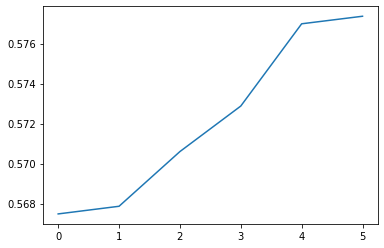

In [110]:
data_train = np.array([model.score(X_train, y_train),
                model_1.score(X1_train, y1_train),
                model_2.score(X2_train, y2_train),
                model_3.score(X3_train, y3_train),
                model_4.score(X4_train, y4_train),
                model_5.score(X5_train, y5_train)])
plt.plot(data_train)
plt.show()

И на тренировочных выборках

In [111]:
print(f"{'качество работы изначальной модели на тестовой выборке' :<55} - {model.score(X_test, y_test)}",
      f"{'качество модели с 1 признаком на тестовой выборке' :<55} - {model_1.score(X1_test, y1_test)}",
      f"{'качество модели с 2 признаками на тестовой выборке' :<55} - {model_2.score(X2_test, y2_test)}",
      f"{'качество модели с 3 признаками на тестовой выборке' :<55} - {model_3.score(X3_test, y3_test)}",
      f"{'качество модели с 4 признаками на тестовой выборке' :<55} - {model_4.score(X4_test, y4_test)}",
      f"{'качество модели с 5 признаками на тестовой выборке' :<55} - {model_5.score(X5_test, y5_test)}",
      sep='\n')

качество работы изначальной модели на тестовой выборке  - 0.5724240314898972
качество модели с 1 признаком на тестовой выборке       - 0.5728107363627322
качество модели с 2 признаками на тестовой выборке      - 0.5742317136898123
качество модели с 3 признаками на тестовой выборке      - 0.5759211181945381
качество модели с 4 признаками на тестовой выборке      - 0.5774655710404341
качество модели с 5 признаками на тестовой выборке      - 0.5778424572804549


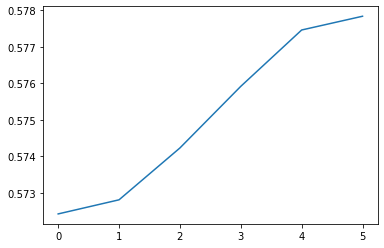

In [112]:
data_test = np.array([model.score(X_test, y_test),
                      model_1.score(X1_test, y1_test),
                      model_2.score(X2_test, y2_test),
                      model_3.score(X3_test, y3_test),
                      model_4.score(X4_test, y4_test),
                      model_5.score(X5_test, y5_test)])
plt.plot(data_test)
plt.show()

Заметим, что результаты линейной регрессии улучшаются при добавлении параметров, это связано с тем, что создание многочлена степени >1 от переменных позволяет лучше разделить данные (так как для переменных $a$ и $b$ значение $\frac{a^k}{b^k}$ больше $\frac{a}{b}$, в результате чего легче различить незначительные изменения параметров, вследствие чего алгоритм точнее определяет итоговый результат, вероятно, при лучшем выборе параметров многочлена, а также при более высоких степенях ($k>2$), можно достигнуть более высокой точности), что в итоге улучшает результат